In [142]:
import numpy as np
import pandas as pd

from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv
import panel as pn
import plotly.express as px
import hvplot.pandas
import hvplot
import matplotlib.pyplot as plt
def timestamp_to_datetime(timestamp):    
    return datetime.fromtimestamp(float(timestamp))

pn.extension("plotly")

%matplotlib inline

In [143]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_secret_key)

str

In [144]:
ticker = 'SPY'

stock_data_df = api.alpha_vantage.historic_quotes(ticker, adjusted=True, output_format='pandas')
stock_data_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-07-03,145.4375,147.4375,145.1875,147.2812,100.6579,1436600.0,0.0,1.0
2000-07-05,146.3750,146.6562,144.3750,144.6250,98.8425,2748200.0,0.0,1.0
2000-07-06,144.9375,146.4687,144.2187,145.7500,99.6114,5963200.0,0.0,1.0
2000-07-07,146.6875,148.7812,146.2500,148.0937,101.2132,3034800.0,0.0,1.0
2000-07-10,147.8750,148.9062,147.5312,147.8437,101.0423,2816100.0,0.0,1.0


In [145]:
#Clean data

#Sort earliest to latest.
stock_data_df.sort_index(inplace=True, ascending=True)

# Drop nulls
stock_data_df.dropna(inplace=True)

# drop duplicates
stock_data_df.drop_duplicates(inplace=True)

#count nulls 
stock_data_df.isnull().sum()

stock_data_df.head()


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-07-03,145.4375,147.4375,145.1875,147.2812,100.6579,1436600.0,0.0,1.0
2000-07-05,146.3750,146.6562,144.3750,144.6250,98.8425,2748200.0,0.0,1.0
2000-07-06,144.9375,146.4687,144.2187,145.7500,99.6114,5963200.0,0.0,1.0
2000-07-07,146.6875,148.7812,146.2500,148.0937,101.2132,3034800.0,0.0,1.0
2000-07-10,147.8750,148.9062,147.5312,147.8437,101.0423,2816100.0,0.0,1.0


In [146]:
stock_data_df.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close'}, inplace=True)
stock_data_df.drop(columns=['4. close','7. dividend amount', '8. split coefficient', '6. volume'], inplace=True)
stock_data_df.sort_index(ascending=True, inplace=True)
stock_data_df.head()

,Open,High,Low,Close
date,,,,
2000-07-03,145.4375,147.4375,145.1875,100.6579
2000-07-05,146.3750,146.6562,144.3750,98.8425
2000-07-06,144.9375,146.4687,144.2187,99.6114
2000-07-07,146.6875,148.7812,146.2500,101.2132
2000-07-10,147.8750,148.9062,147.5312,101.0423


In [148]:
#stock_data_df = stock_data_df["Price"].resample(self.period).ohlc()

In [149]:
#stock_data_df['Daily Return'] = stock_data_df['Close'].dropna().pct_change()
#stock_data_df.head()

In [152]:
bollinger_window = 20
bollinger_window_long = 35
no_of_std=1.5

# Calculate rolling mean and standard deviation
stock_data_df['Bollinger middle'] = stock_data_df['Close'].rolling(window=bollinger_window).mean()
stock_data_df['Bollinger Long']= stock_data_df['Close'].rolling(window= bollinger_window_long).mean()
stock_data_df['Bollinger STD'] = stock_data_df['Close'].rolling(bollinger_window).std()

# Calculate upper and lowers bands of bollinger band
stock_data_df['Bollinger Upper']  = stock_data_df['Bollinger middle'] + (stock_data_df['Bollinger STD'] * no_of_std)
stock_data_df['Bollinger Lower']  = stock_data_df['Bollinger middle'] - (stock_data_df['Bollinger STD'] * no_of_std)

#btc_df['bollinger_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
#btc_df['bollinger_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
#btc_df['bollinger_signal'] = btc_df['bollinger_long'] + btc_df['bollinger_short']

#btc_df.head()

stock_data_df.head(10)

,Open,High,Low,Close,Bollinger middle,Bollinger Long,Bollinger STD,Bollinger Upper,Bollinger Lower
date,,,,,,,,,
2000-07-03,145.4375,147.4375,145.1875,100.6579,NaN,NaN,NaN,NaN,NaN
2000-07-05,146.3750,146.6562,144.3750,98.8425,NaN,NaN,NaN,NaN,NaN
2000-07-06,144.9375,146.4687,144.2187,99.6114,NaN,NaN,NaN,NaN,NaN
2000-07-07,146.6875,148.7812,146.2500,101.2132,NaN,NaN,NaN,NaN,NaN
2000-07-10,147.8750,148.9062,147.5312,101.0423,NaN,NaN,NaN,NaN,NaN
2000-07-11,147.4687,149.1250,147.1562,101.2559,NaN,NaN,NaN,NaN,NaN
2000-07-12,149.2812,150.1250,148.6875,101.9180,NaN,NaN,NaN,NaN,NaN
2000-07-13,149.9843,150.3750,149.1875,102.3665,NaN,NaN,NaN,NaN,NaN
2000-07-14,150.4375,151.2500,149.6718,103.3703,NaN,NaN,NaN,NaN,NaN


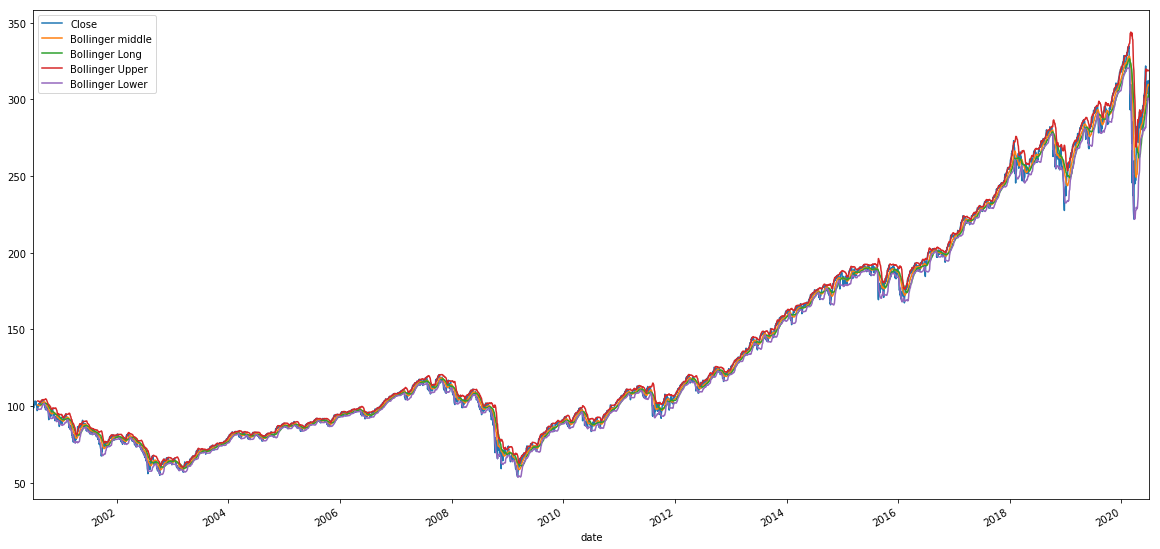

In [153]:
stock_data_df[['Close','Bollinger middle','Bollinger Long','Bollinger Upper','Bollinger Lower']].plot(figsize=(20,10))

In [154]:
stock_data_df= stock_data_df[['Close','Bollinger middle','Bollinger Long','Bollinger Upper','Bollinger Lower']]
stock_data_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [155]:
stock_data_df.reset_index(level="date",inplace=True)
stock_data_df.head()

,date,Close,Bollinger middle,Bollinger Long,Bollinger Upper,Bollinger Lower
0,2000-07-03,100.6579,NaN,NaN,NaN,NaN
1,2000-07-05,98.8425,NaN,NaN,NaN,NaN
2,2000-07-06,99.6114,NaN,NaN,NaN,NaN
3,2000-07-07,101.2132,NaN,NaN,NaN,NaN
4,2000-07-10,101.0423,NaN,NaN,NaN,NaN


In [156]:
import plotly.graph_objects as go
import pandas as pd

fig = px.line(stock_data_df, x='date', y=['Close','Bollinger middle','Bollinger Long','Bollinger Upper','Bollinger Lower'], 
              title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig

In [157]:
stock_data_df.set_index("date", inplace=True)

In [158]:
#stock_data_df.dropna(subset=['Position'])
stock_data_df['Signal'] = None

mode = 'Open'
for index in range(len(stock_data_df)):
    if index == 0:
                continue

    row = stock_data_df.iloc[index]
    prev_row = stock_data_df.iloc[index - 1]

            # open?
    if mode == 'Open' and row['Close'] < row['Bollinger Lower'] and prev_row['Close'] > prev_row['Bollinger Lower']:
        stock_data_df.iloc[index, stock_data_df.columns.get_loc('Signal')] = 1
        mode = 'Close'

            # close?
    if mode == 'Close' and row['Close'] > row['Bollinger Upper'] and prev_row['Close'] < prev_row['Bollinger Upper']:
        stock_data_df.iloc[index, stock_data_df.columns.get_loc('Signal')] = -1
        mode = 'Open'   

/Users/bulya/opt/anaconda3/envs/cam/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/bulya/opt/anaconda3/envs/cam/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [159]:
stock_data_df.dropna(subset=['Signal'])

,Close,Bollinger middle,Bollinger Long,Bollinger Upper,Bollinger Lower,Signal
date,,,,,,
2000-09-12,101.4909,102.863050,101.576871,104.041086,101.685014,1
2000-11-06,98.5184,95.205970,96.543937,98.393679,92.018261,-1
2000-11-20,92.2875,95.619760,95.424377,98.588033,92.651487,1
2001-01-23,93.4795,91.088020,91.257951,93.175320,89.000720,-1
2001-02-09,90.5926,92.833890,91.652889,94.656814,91.010966,1
2001-04-12,81.9500,79.148275,81.617806,81.591434,76.705116,-1
2001-06-13,86.0165,88.187585,87.507209,90.169009,86.206161,1
2001-10-11,76.3197,72.426615,75.502563,76.116247,68.736983,-1
2001-10-31,73.4057,75.074300,73.638931,76.640843,73.507757,1


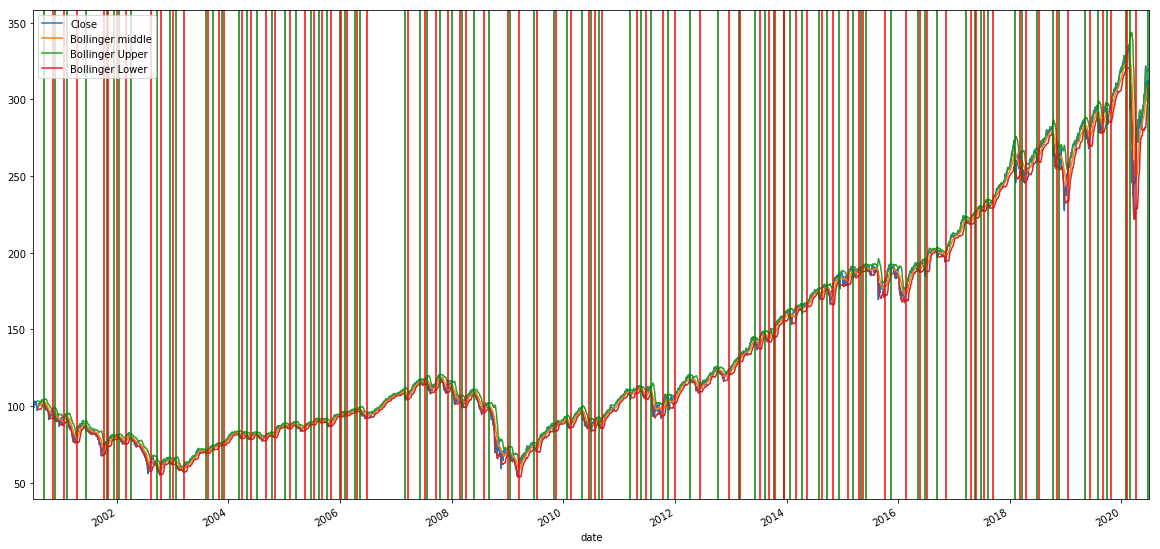

In [160]:
stock_data_df[['Close', 'Bollinger middle', 'Bollinger Upper','Bollinger Lower']].plot(figsize=(20, 10))
#stock_data_df.hvplot.line()
for index, pos in stock_data_df.dropna(subset=['Signal'])['Signal'].iteritems():
    plt.axvline(index, color='green' if pos == 1 else 'red')

/Users/bulya/opt/anaconda3/envs/cam/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/bulya/opt/anaconda3/envs/cam/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/bulya/opt/anaconda3/envs/cam/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

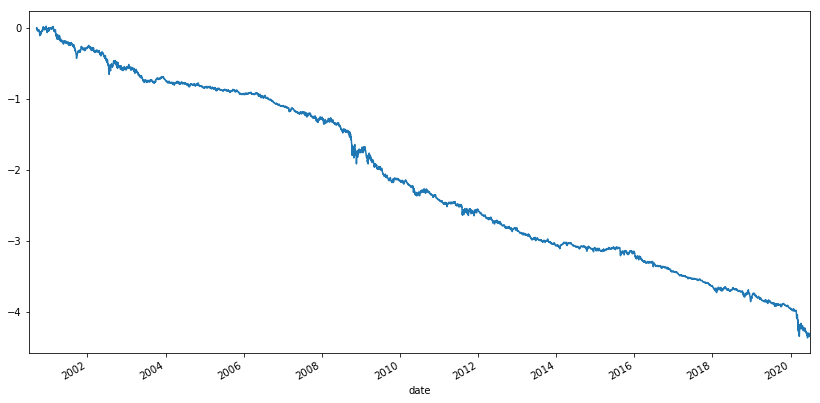

In [161]:
#strategy return
stock_data_df['Signal'].fillna(method='ffill', inplace=True)

# calculate the daily market return and multiply that by the position to determine strategy returns
stock_data_df['Daily Return'] = stock_data_df['Close'].pct_change()
stock_data_df['Strategy Return'] = stock_data_df['Daily Return'] * stock_data_df['Signal']

# plot the strategy returns
stock_data_df['Strategy Return'].cumsum().plot(figsize=(14, 7))

In [162]:
class BollingerBandsSimulator:

    def __init__(self, stock_data_df, period, bollinger_window, no_of_std, figsize=None):
        self.stock_data_df = stock_data_df
        #self.from_date = from_date
        self.period = period
        self.bollinger_window = bollinger_window
        self.no_of_std = no_of_std
        self.figsize = figsize
    
    def _build_dataframe(self):
        self.stock_data_df.sort_index(ascending=True, inplace=True)
        
                
    def _bollinger_bands(self):
        
        self.stock_data_df['Bollinger middle'] = self.stock_data_df['Close'].rolling(self.bollinger_window).mean()
        #self.stock_data_df['Bollinger Long']= self.stock_data_df['Close'].rolling(self.bollinger_window_long).mean()
        self.stock_data_df['Bollinger STD'] = self.stock_data_df['Close'].rolling(self.bollinger_window).std()

        self.stock_data_df['Bollinger Upper']  = self.stock_data_df['Bollinger middle'] + (self.stock_data_df['Bollinger STD'] * self.no_of_std)
        self.stock_data_df['Bollinger Lower']  = self.stock_data_df['Bollinger middle'] - (self.stock_data_df['Bollinger STD'] * self.no_of_std)


    def _calculate_signals(self):
        self.stock_data_df['Signal'] = None

        mode = 'Open'
        for index in range(len(self.stock_data_df)):
            if index == 0:
                continue

            row = self.stock_data_df.iloc[index]
            prev_row = self.stock_data_df.iloc[index - 1]

            # open?
            if mode == 'Open' and row['Close'] < row['Bollinger Lower'] and prev_row['Close'] > prev_row['Bollinger Lower']:
                self.stock_data_df.iloc[index, self.stock_data_df.columns.get_loc('Signal')] = 1
                mode = 'Close'

            # close?
            if mode == 'Close' and row['Close'] > row['Bollinger Upper'] and prev_row['Close'] < prev_row['Bollinger Upper']:
                self.stock_data_df.iloc[index, self.stock_data_df.columns.get_loc('Signal')] = -1
                mode = 'Open'        
        
    def _returns(self):
        self.stock_data_df['Signal'].fillna(method='ffill', inplace=True)
        self.stock_data_df['Daily Return'] = self.stock_data_df['Close'].pct_change()
        self.stock_data_df['Strategy Return'] = self.stock_data_df['Daily Return'] * self.stock_data_df['Signal']

    def _plot_returns(self):
        self.stock_data_df['Strategy Return'].cumsum().plot(figsize=self.figsize)

    def simulate(self):
        self._build_dataframe()
        self._bollinger_bands()
        self._calculate_signals()
        self._returns()
        self._plot_returns()

        return (
            self.period, 
            self.bollinger_window, 
            self.no_of_std, 
            self.stock_data_df['Strategy Return'].sum()
        )

/Users/bulya/opt/anaconda3/envs/cam/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



('24H', 10, 1.5, -6.659069733922505)

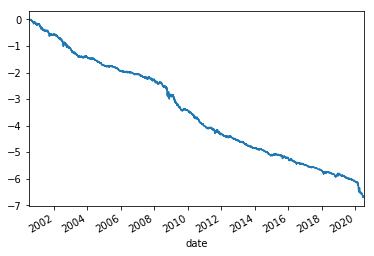

In [163]:
simulator = BollingerBandsSimulator(
    stock_data_df, 
    #from_date="2018-01-01", 
    period="24H", 
    bollinger_window=10, 
    no_of_std=1.5
)
simulator.simulate()

In [167]:
windows = np.linspace(10, 100, 5, dtype=int)
stds = np.linspace(1, 3, 5)
periods = np.array([12, 48])

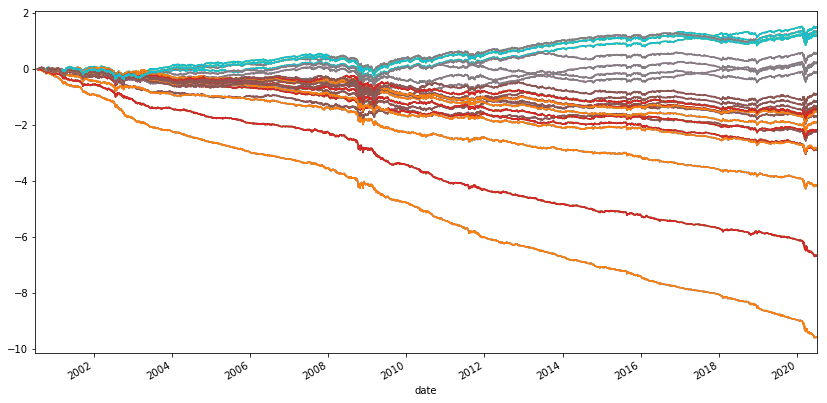

In [168]:
result_df = pd.DataFrame({
    'period': [], 
    'bollinger_window': [],
    'no_of_std': [],
    'result': []
})
for window in windows:
    for std in stds:
        for period in periods:
            simulator = BollingerBandsSimulator(
                stock_data_df, 
                #from_date 
                period="{}H".format(period), 
                bollinger_window=window, 
                no_of_std=std,
                figsize=(14, 7)
            )
            period, bollinger_window, no_of_std, result = simulator.simulate()
            result_df = result_df.append({
                'period': period, 
                'bollinger_window': bollinger_window, 
                'no_of_std': no_of_std, 
                'result': result
            }, ignore_index=True)

In [166]:
result_df.sort_values(by=['result'], ascending=False)[:5]

,period,bollinger_window,no_of_std,result
28,12H,55.0,3.0,1.484531
29,24H,55.0,3.0,1.484531
47,24H,100.0,2.5,1.335035
46,12H,100.0,2.5,1.335035
49,24H,100.0,3.0,1.321732


('12H', 55, 3, 1.484531452982778)

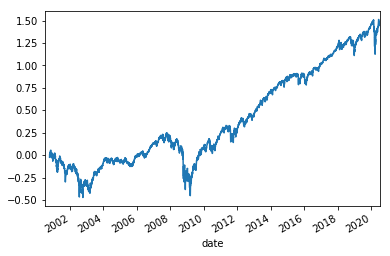

In [141]:
simulator = BollingerBandsSimulator(
    stock_data_df, 
    #from_date, 
    period="12H", 
    bollinger_window=55, 
    no_of_std=3
)
simulator.simulate()